# Tutorial 4. Intro To Plotnine
## The grammar describes how plots are constructed by combining data, aesthetic mappings, geometric objects, and other components.

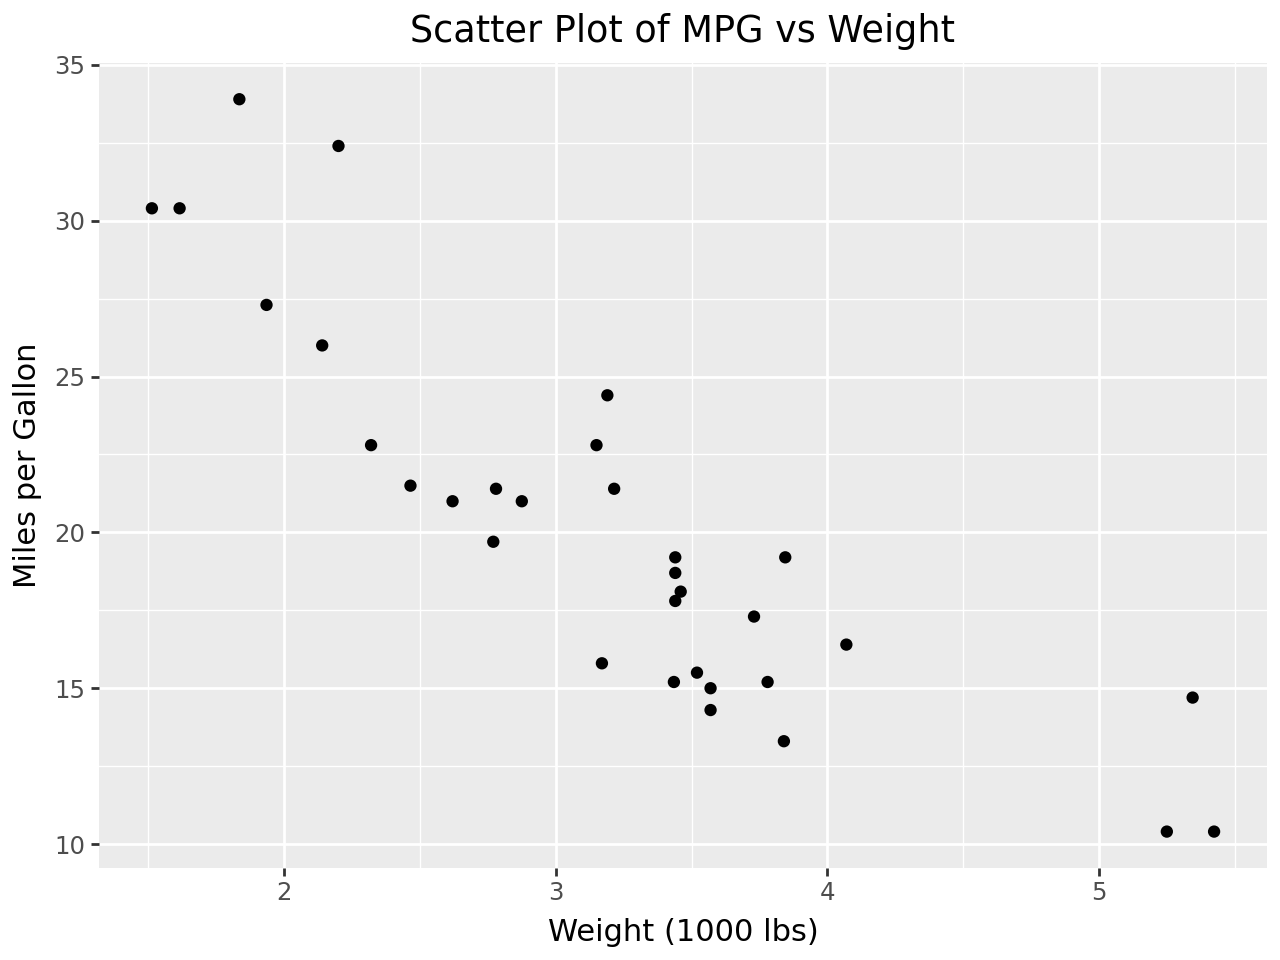

In [3]:
# Import required libraries
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs

# Load the mtcars dataset
mtcars = pd.read_csv('mtcars_datasets.csv')


# Create a basic scatter plot
(ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 labs(title='Scatter Plot of MPG vs Weight',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))

# Add Aesthetic Mappings - example Color by cyl (number of cylinders)

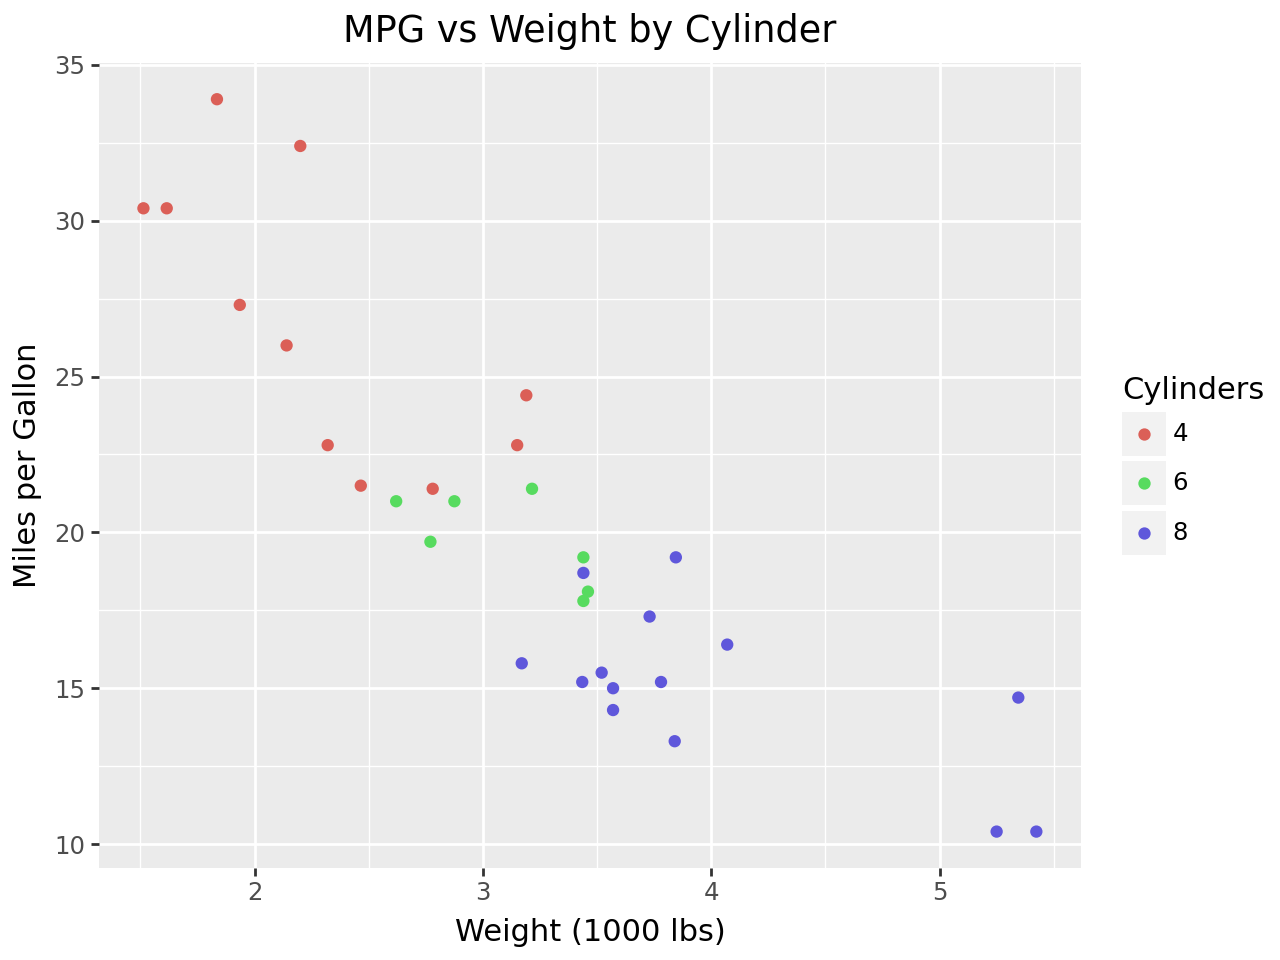

In [4]:
(ggplot(mtcars, aes(x='wt', y='mpg', color='factor(cyl)')) +
 geom_point() +
 labs(title='MPG vs Weight by Cylinder',
      x='Weight (1000 lbs)',
      y='Miles per Gallon',
      color='Cylinders'))

# Another example - by Horsepower

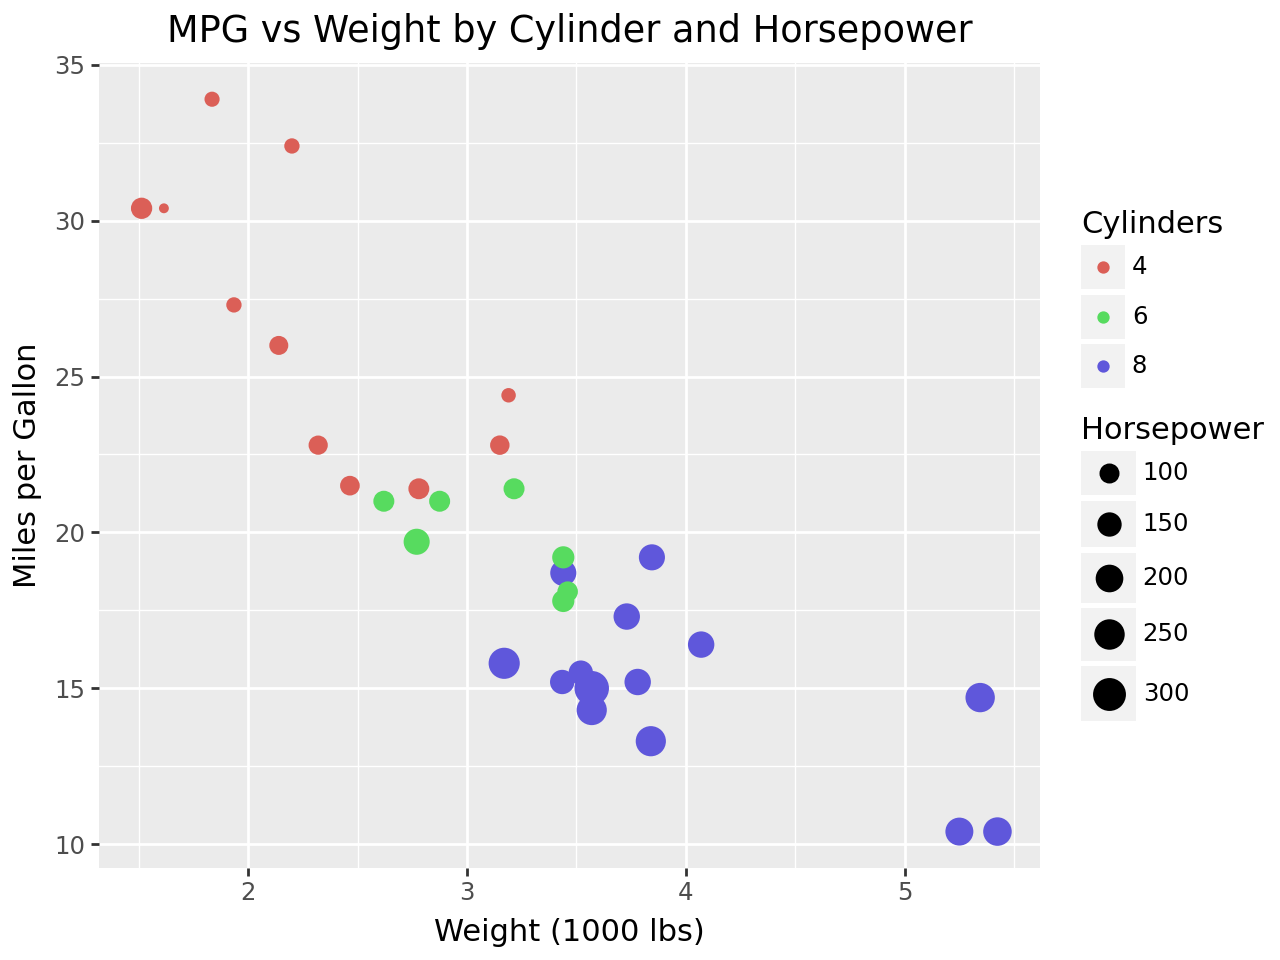

In [5]:
(ggplot(mtcars, aes(x='wt', y='mpg', color='factor(cyl)', size='hp')) +
 geom_point() +
 labs(title='MPG vs Weight by Cylinder and Horsepower',
      x='Weight (1000 lbs)',
      y='Miles per Gallon',
      color='Cylinders',
      size='Horsepower'))

# Geomettric Objects
## geom_* specifies the type of plot. You can create scatter plots, line charts, bar plots, histograms, etc. Let's look at an example

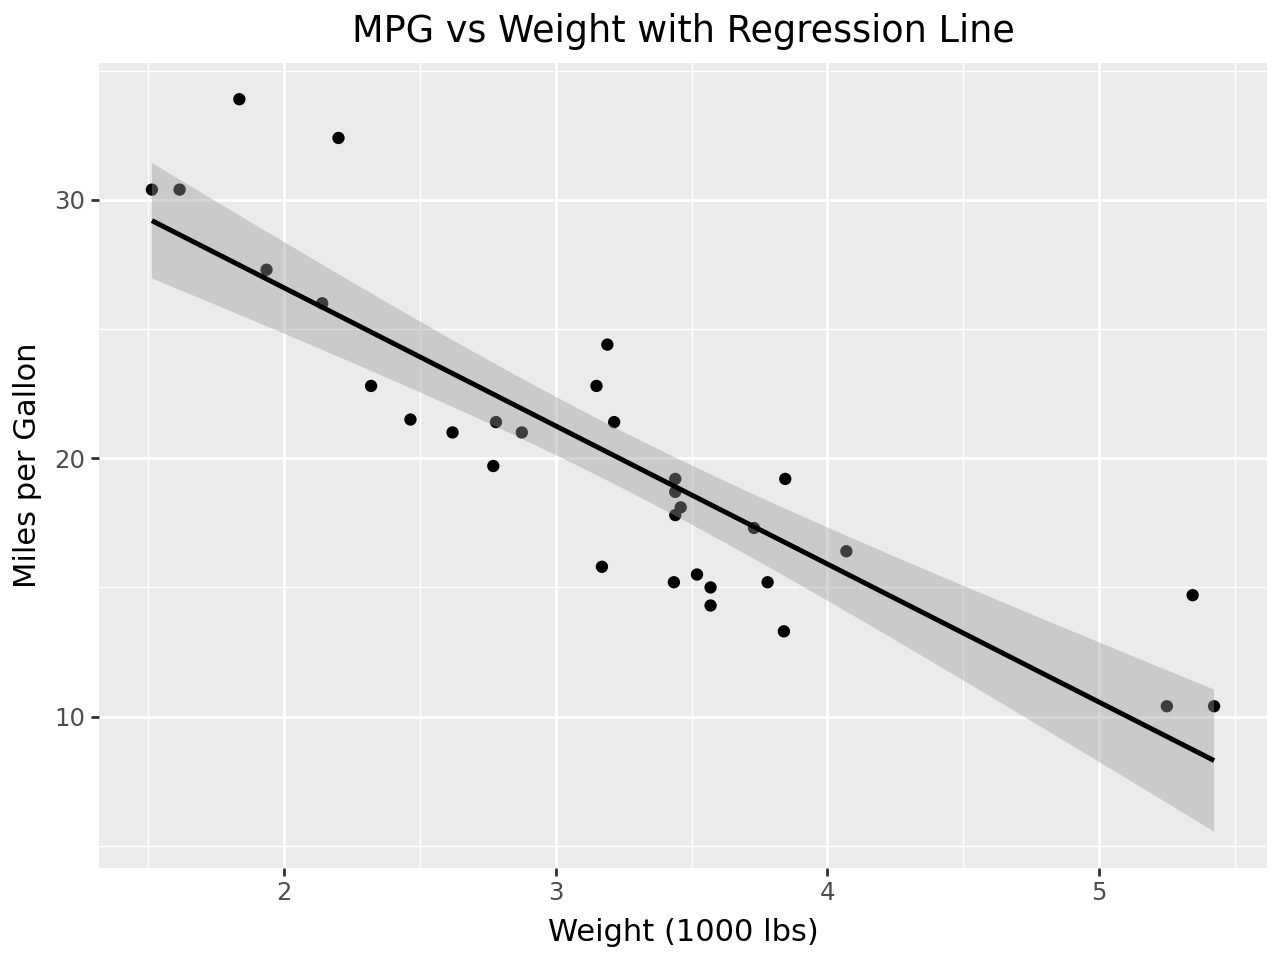

In [6]:
#Adding a smooth line (geom_smooth)
from plotnine import geom_smooth

(ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 geom_smooth(method='lm') +  # Linear regression line
 labs(title='MPG vs Weight with Regression Line',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))

# Faceting - Faceting allows you to split you rplot into multiple panels based on a factor

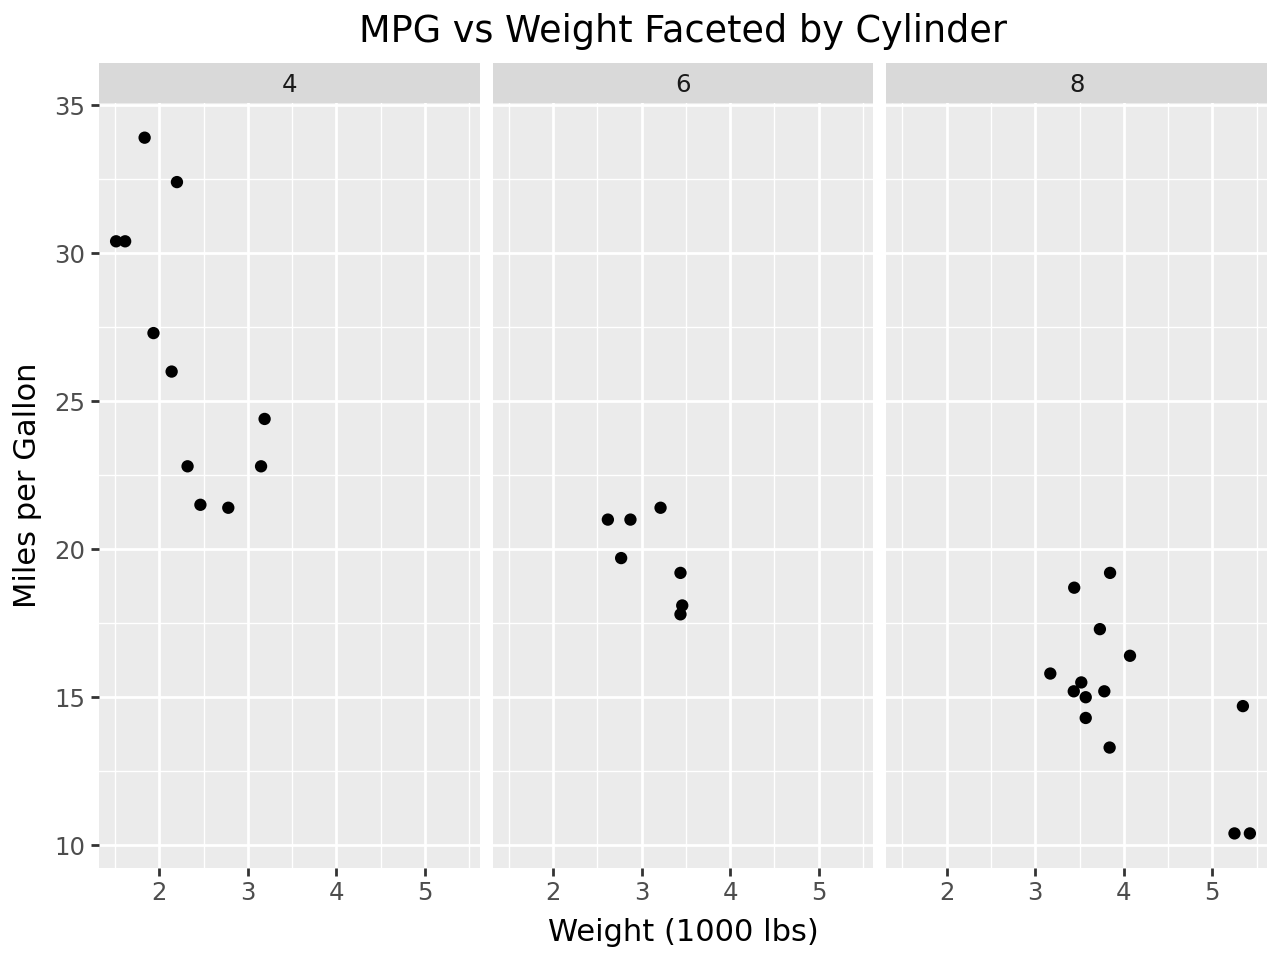

In [7]:
#Facet by cyl
from plotnine import facet_wrap

(ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 facet_wrap('~cyl') +  # Split into subplots by cylinders
 labs(title='MPG vs Weight Faceted by Cylinder',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))

# Customizing Scales - Scales control the mapping from data to aesthetic attributes. You can customize scales for color, size and more.

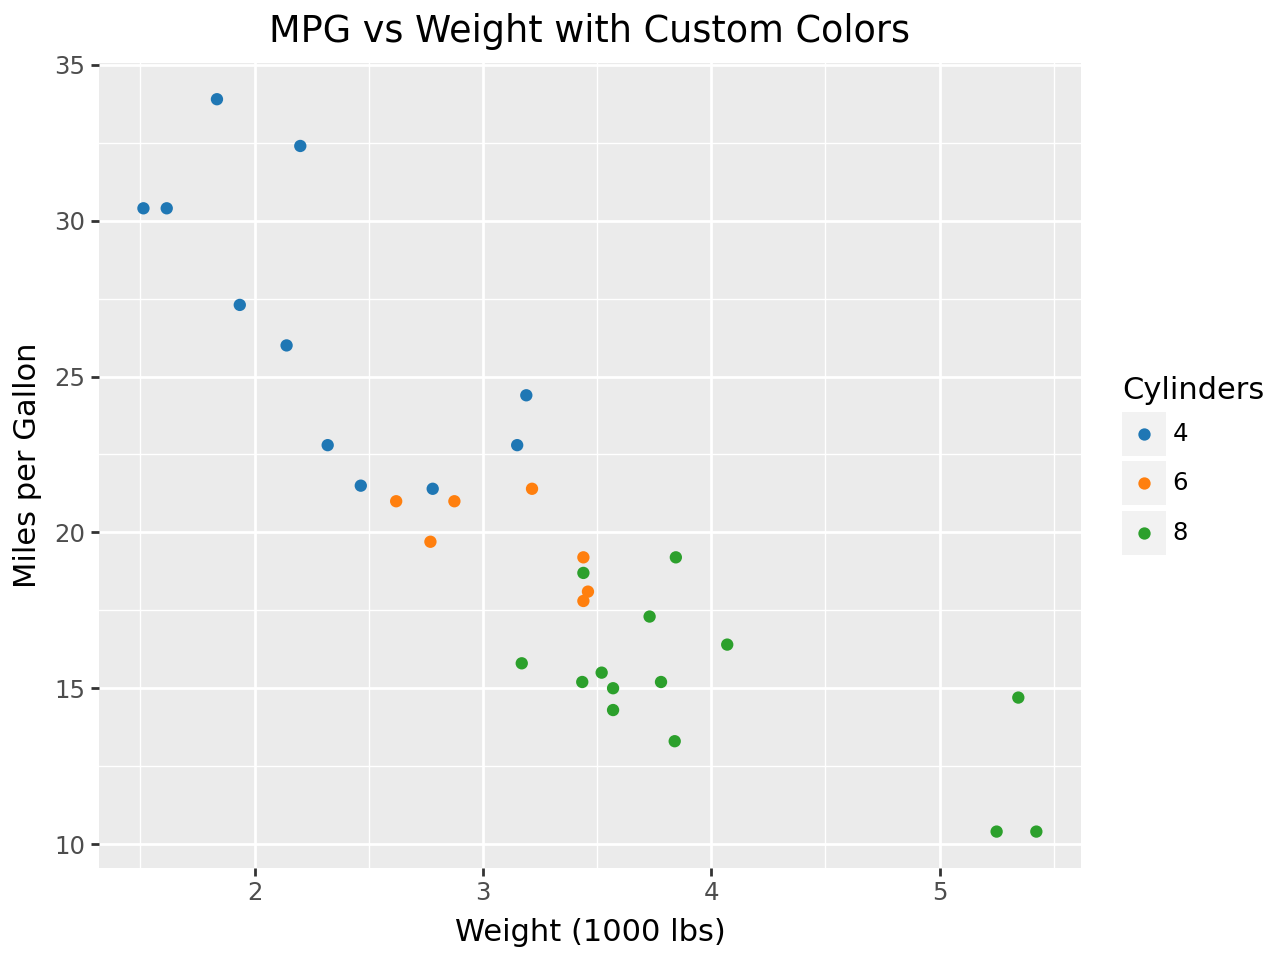

In [8]:
#Custom color scale
from plotnine import scale_color_manual

(ggplot(mtcars, aes(x='wt', y='mpg', color='factor(cyl)')) +
 geom_point() +
 scale_color_manual(values=['#1f77b4', '#ff7f0e', '#2ca02c']) +  # Custom colors
 labs(title='MPG vs Weight with Custom Colors',
      x='Weight (1000 lbs)',
      y='Miles per Gallon',
      color='Cylinders'))

# Flip Coordinates - Create a bar plot showing distribution of cylinders.

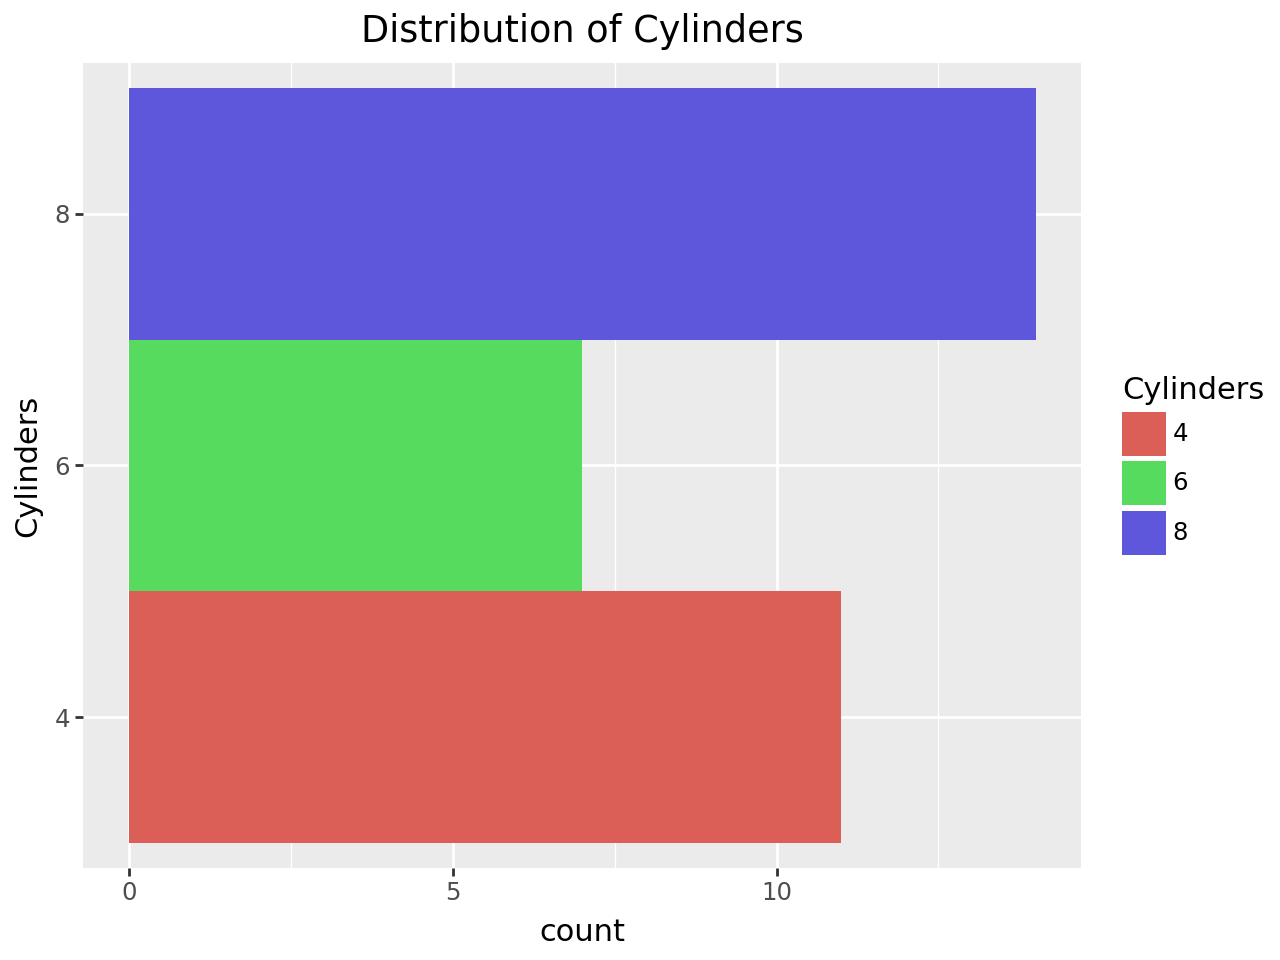

In [9]:
#Fliping coordinates axis
import pandas as pd
from plotnine import ggplot, aes, geom_bar, coord_flip, labs

# Load the mtcars dataset
mtcars = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv')

# Create a bar plot showing distribution of cylinders
(ggplot(mtcars, aes(x='factor(cyl)', fill='factor(cyl)')) +
 geom_bar(width=1) +
 coord_flip() +  # Flip coordinates as a simple workaround
 labs(title='Distribution of Cylinders',
      x='Cylinders',
      fill='Cylinders'))

# Themes - Themes allow you to adjust the non-data aspects of the plot such as background, axis labels, and gridlines.

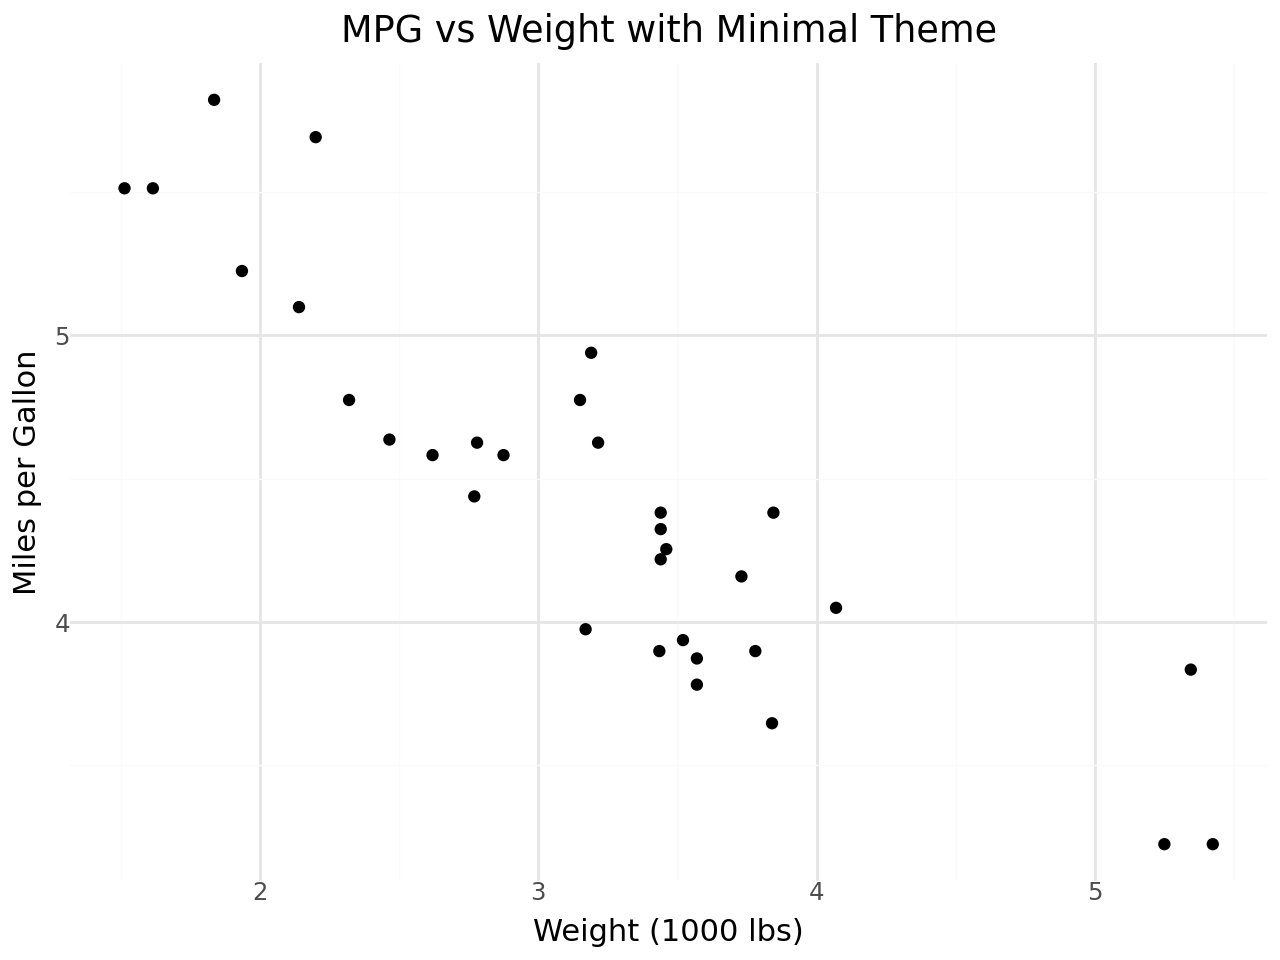

In [10]:
#Apply a minimal theme
from plotnine import theme_minimal

(ggplot(mtcars, aes(x='wt', y='mpg')) +
 geom_point() +
 theme_minimal() +  # Minimalistic theme
 labs(title='MPG vs Weight with Minimal Theme',
      x='Weight (1000 lbs)',
      y='Miles per Gallon'))

# Saving the plot - You can save your plot using the save method

In [11]:
#Save a plot
# Save the plot to a file
p = (ggplot(mtcars, aes(x='wt', y='mpg')) +
     geom_point() +
     labs(title='MPG vs Weight',
          x='Weight (1000 lbs)',
          y='Miles per Gallon'))

p.save("mpg_vs_weight.png")

C:\Users\vfashina\venv477\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\vfashina\venv477\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: mpg_vs_weight.png


## Practice exercise 1. Createa a bar chart that displays the number of cars per cylinder (cyl)

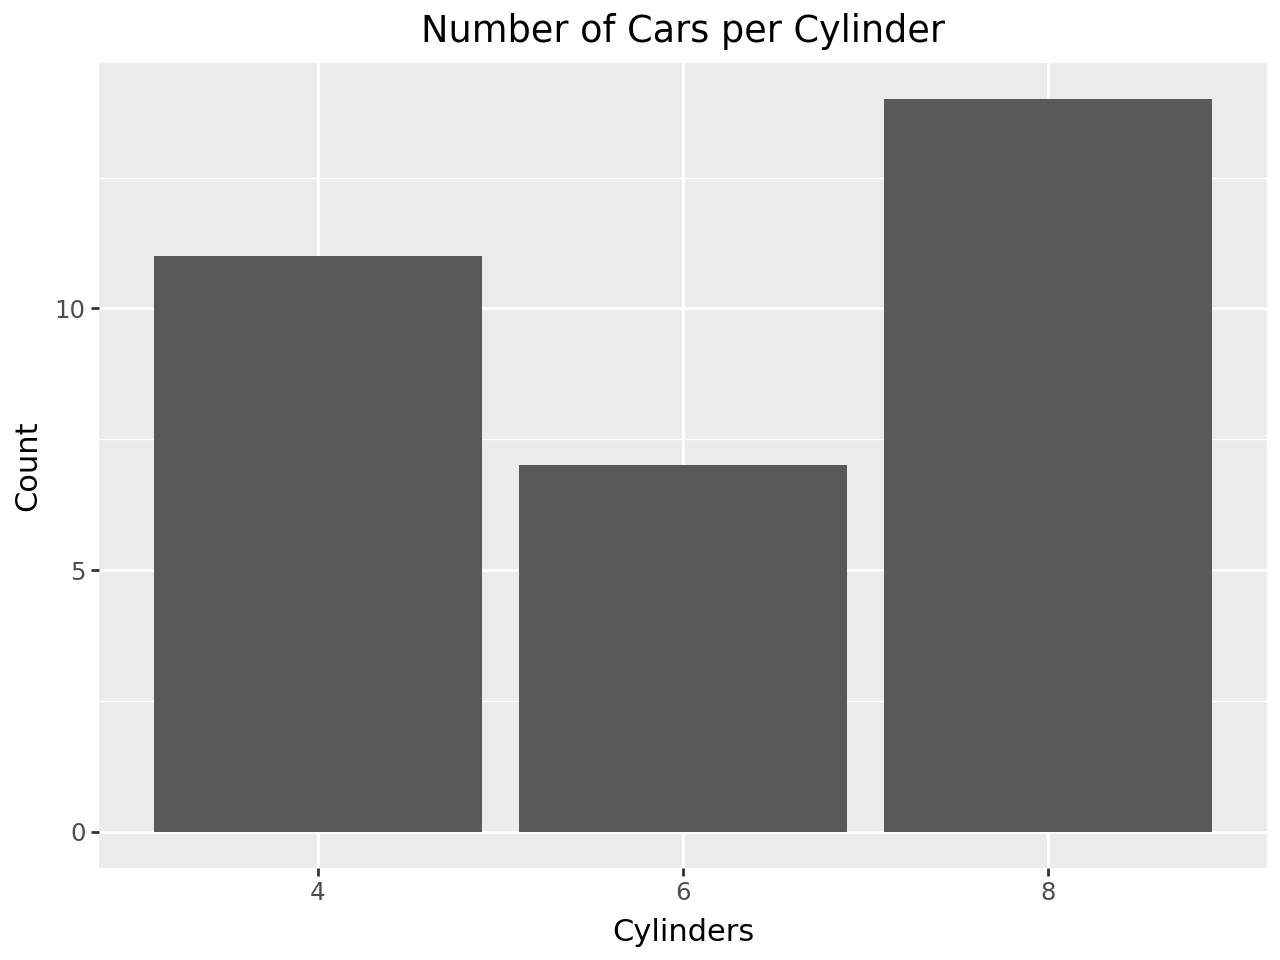

In [12]:
from plotnine import ggplot, aes, geom_bar, labs

# Bar chart: Number of cars per cylinder (cyl)
(ggplot(mtcars, aes(x='factor(cyl)')) +
 geom_bar() +
 labs(title='Number of Cars per Cylinder',
      x='Cylinders',
      y='Count'))


# Practice 2 - Add error bars to a plot of horsepower (hp) vs. weight (wt).

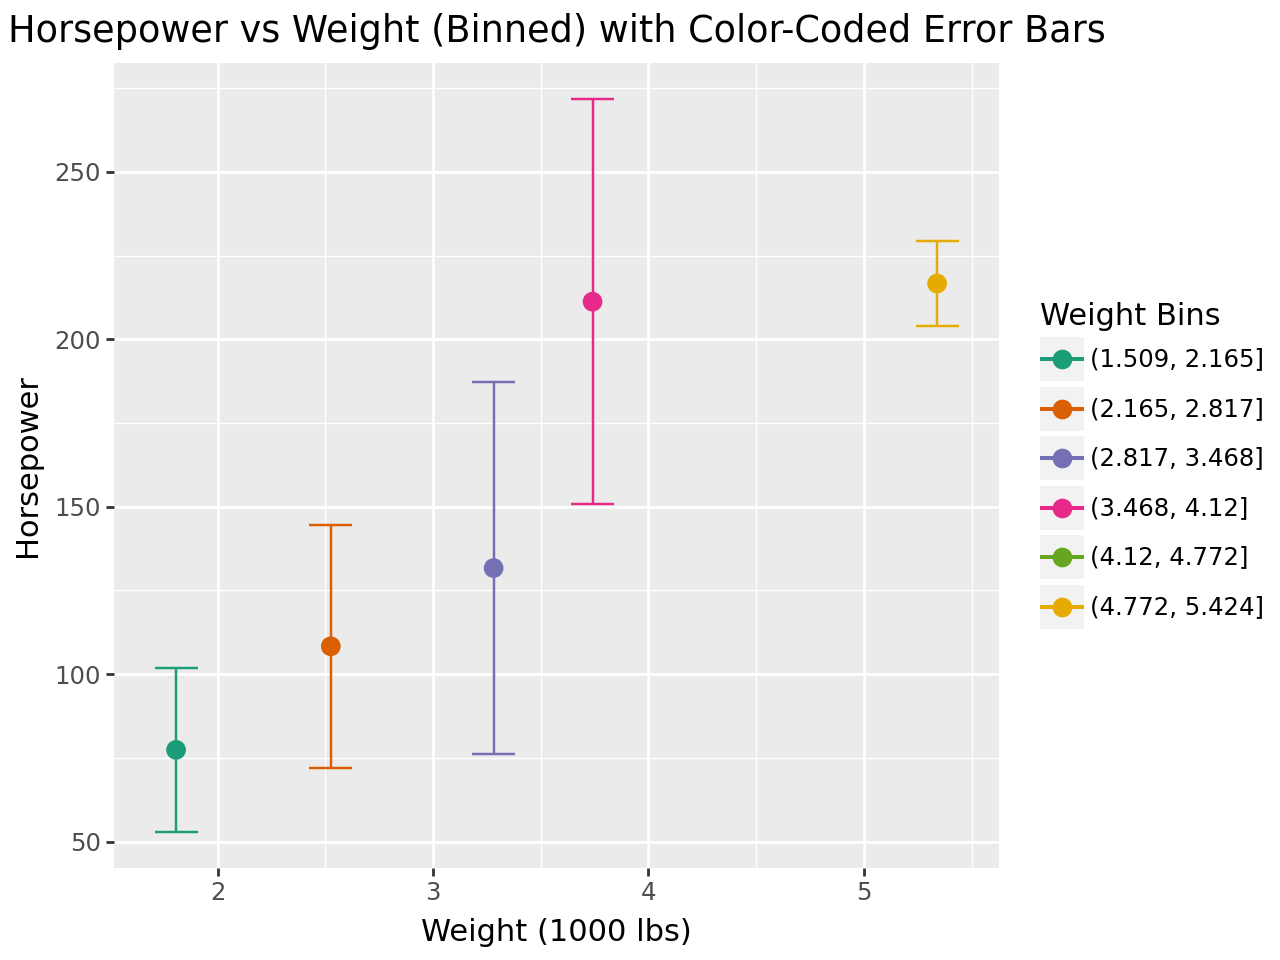

In [17]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_errorbar, labs
import numpy as np

# Load the mtcars dataset
mtcars = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv')

# Create weight bins to group the data into ranges
mtcars['wt_bins'] = pd.cut(mtcars['wt'], bins=5)  # Binning weight into 5 groups

# Calculate the mean and standard deviation for each bin
mtcars_summary = mtcars.groupby('wt_bins').agg(
    wt_mean=('wt', 'mean'),
    hp_mean=('hp', 'mean'),
    hp_sd=('hp', 'std')).reset_index()

# Scatter plot with error bars
(ggplot(mtcars_summary, aes(x='wt_mean', y='hp_mean')) +
 geom_point(size=3) +
 geom_errorbar(aes(ymin='hp_mean - hp_sd', ymax='hp_mean + hp_sd'), width=0.2) +
 labs(title='Horsepower vs Weight (Binned) with Error Bars',
      x='Weight (1000 lbs)',
      y='Horsepower'))



### The error bars are the vertical lines that extend above and below each point on the plot, representing the range of uncertainty or variation around the mean. The error bars show the standard deviation of horsepower (hp) for cars grouped into different weight (wt) bins.

### Lets explore other ways of making the error bars more aesthetically appealing and easier to understand. Lets thicken the bars and use different colors for points and bars.

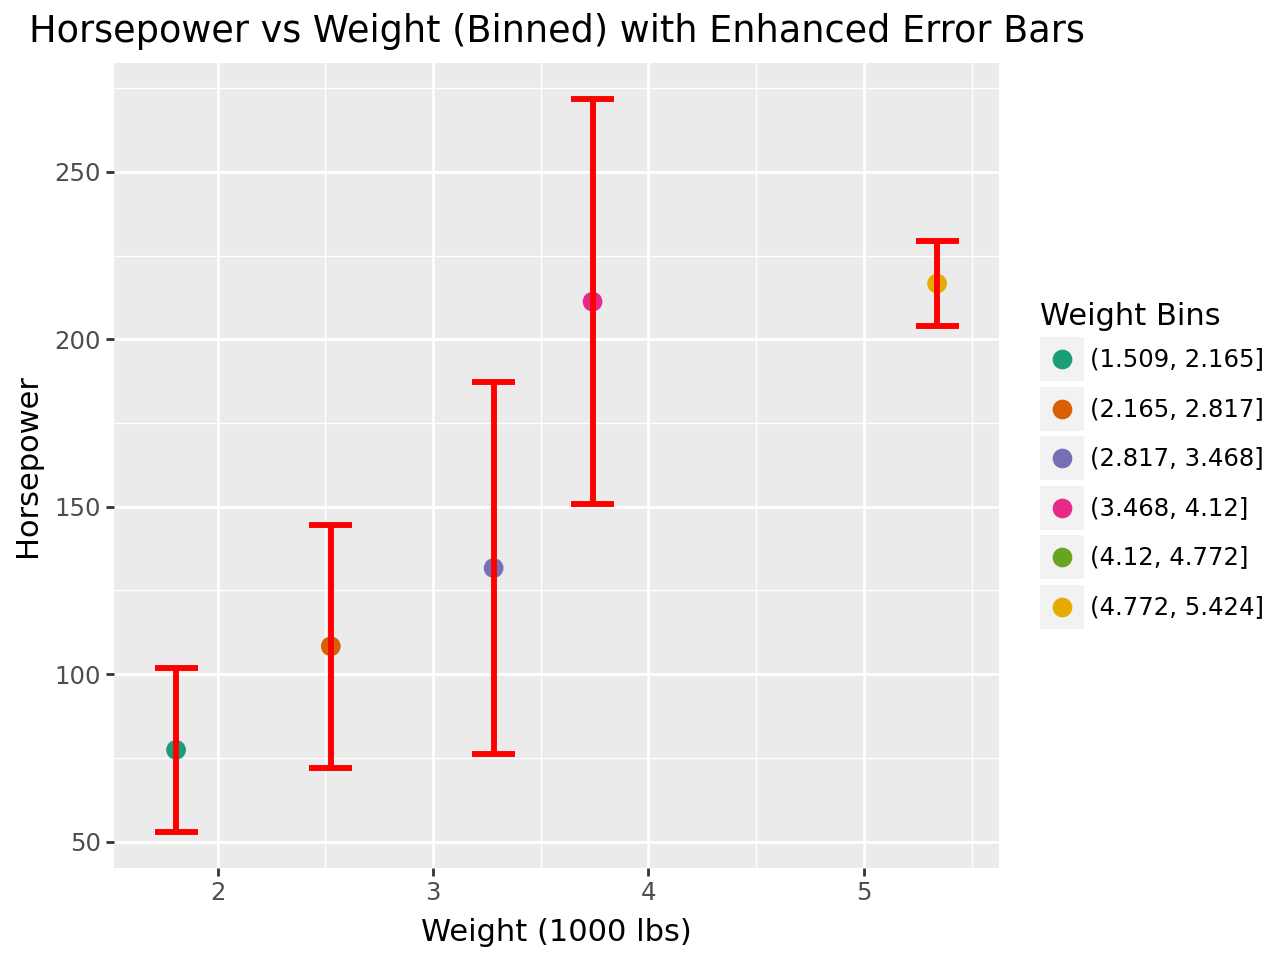

In [18]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_errorbar, labs, scale_color_brewer
import numpy as np

# Load the mtcars dataset
mtcars = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv')

# Create weight bins to group the data into ranges
mtcars['wt_bins'] = pd.cut(mtcars['wt'], bins=6)

# Calculate the mean and standard deviation for each bin
mtcars_summary = mtcars.groupby('wt_bins', observed=False).agg(
    wt_mean=('wt', 'mean'),
    hp_mean=('hp', 'mean'),
    hp_sd=('hp', 'std')).reset_index()

# Remove any rows where we might have missing data
mtcars_summary = mtcars_summary.dropna()

# Scatter plot with error bars, adding color for each weight bin
(ggplot(mtcars_summary, aes(x='wt_mean', y='hp_mean', color='wt_bins')) +
 geom_point(size=3) +
 geom_errorbar(aes(ymin='hp_mean - hp_sd', ymax='hp_mean + hp_sd'), 
               width=0.2, size=1.2, color='red') +  # Thicker, red error bars
 scale_color_brewer(type='qual', palette='Dark2') +
 labs(title='Horsepower vs Weight (Binned) with Enhanced Error Bars',
      x='Weight (1000 lbs)',
      y='Horsepower',
      color='Weight Bins'))


### Box Plot (geom_boxplot()) - A box plot shows the distribution of a numeric variable by displaying the median, quartiles, and potential outliers. This is a good way to compare distributions across different categories (like cylinders in the mtcars dataset).

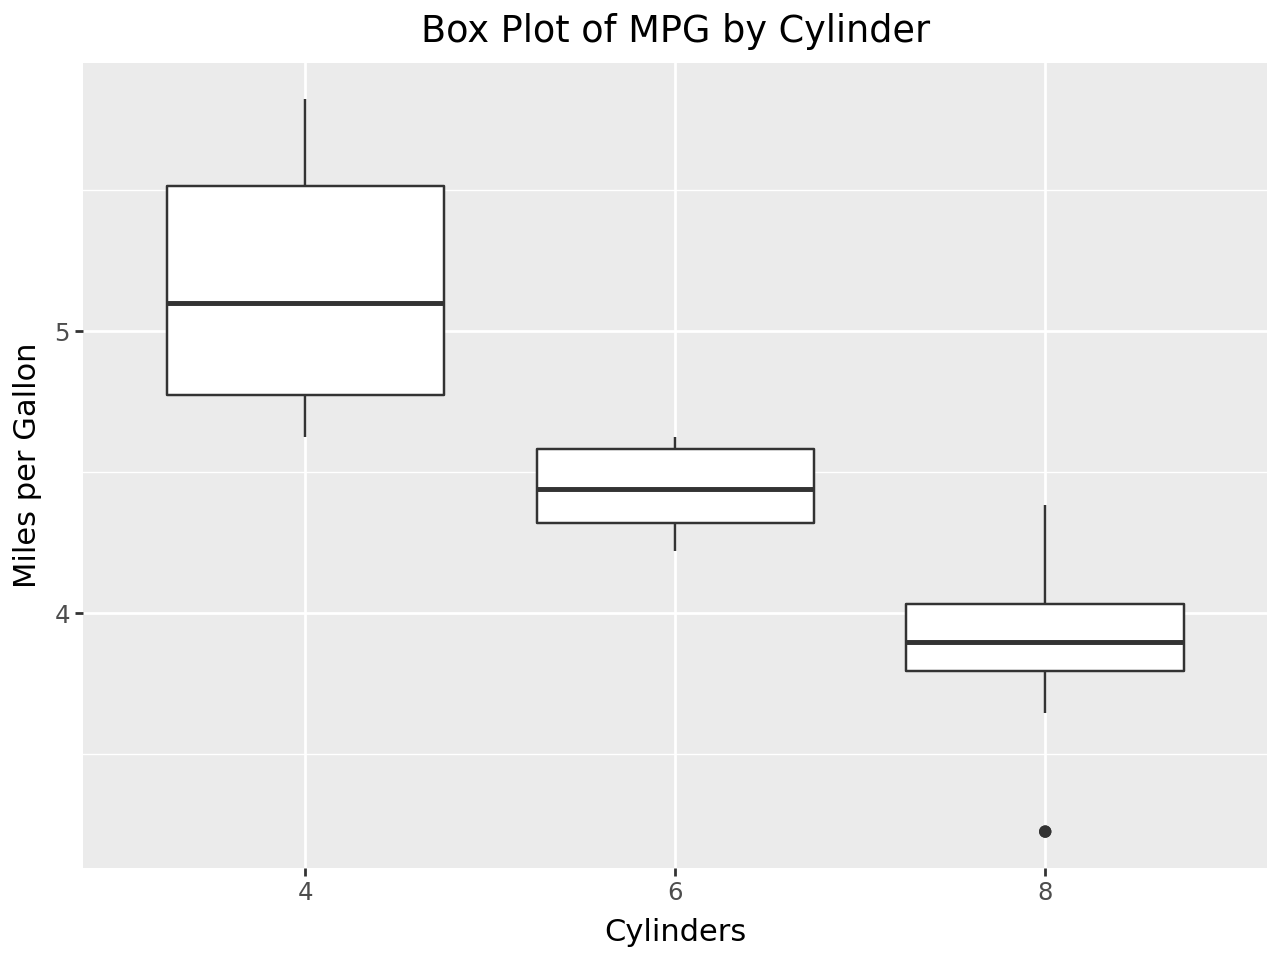

In [19]:
#Box Plot: Miles per Gallon (mpg) vs. Cylinders (cyl)

Code Example for Box Plot: Miles per Gallon (mpg) vs. Cylinders (cyl)
from plotnine import ggplot, aes, geom_boxplot, labs

# Box plot: MPG vs Cylinders
(ggplot(mtcars, aes(x='factor(cyl)', y='mpg')) +
 geom_boxplot() +
 labs(title='Box Plot of MPG by Cylinder',
      x='Cylinders',
      y='Miles per Gallon'))


### Explore other geometries like geom_boxplot() and geom_violin().

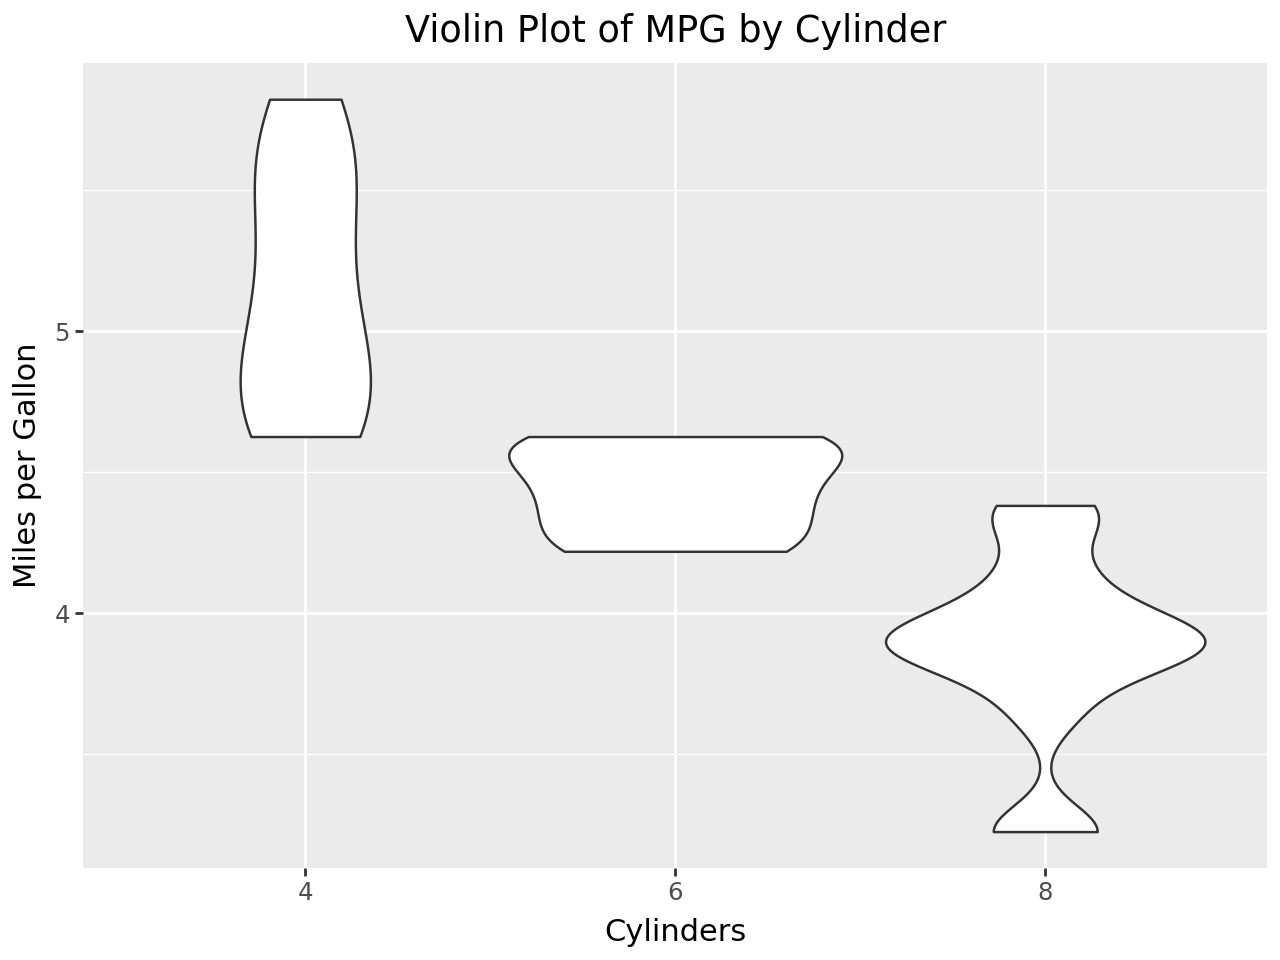

In [20]:
#Violin plot: Miles per gallon vs Cyclinder (cyl)
from plotnine import ggplot, aes, geom_violin, labs

# Violin plot: MPG vs Cylinders
(ggplot(mtcars, aes(x='factor(cyl)', y='mpg')) +
 geom_violin() +
 labs(title='Violin Plot of MPG by Cylinder',
      x='Cylinders',
      y='Miles per Gallon'))


### The width of the violin plot at different points represents the density of the data. The wider sections of the violin indicate where data points are more concentrated, and the narrower sections indicate fewer data points. Like the box plot, the data is grouped by the number of cylinders (cyl). 

In [ ]:
### Combine box and violin plots.

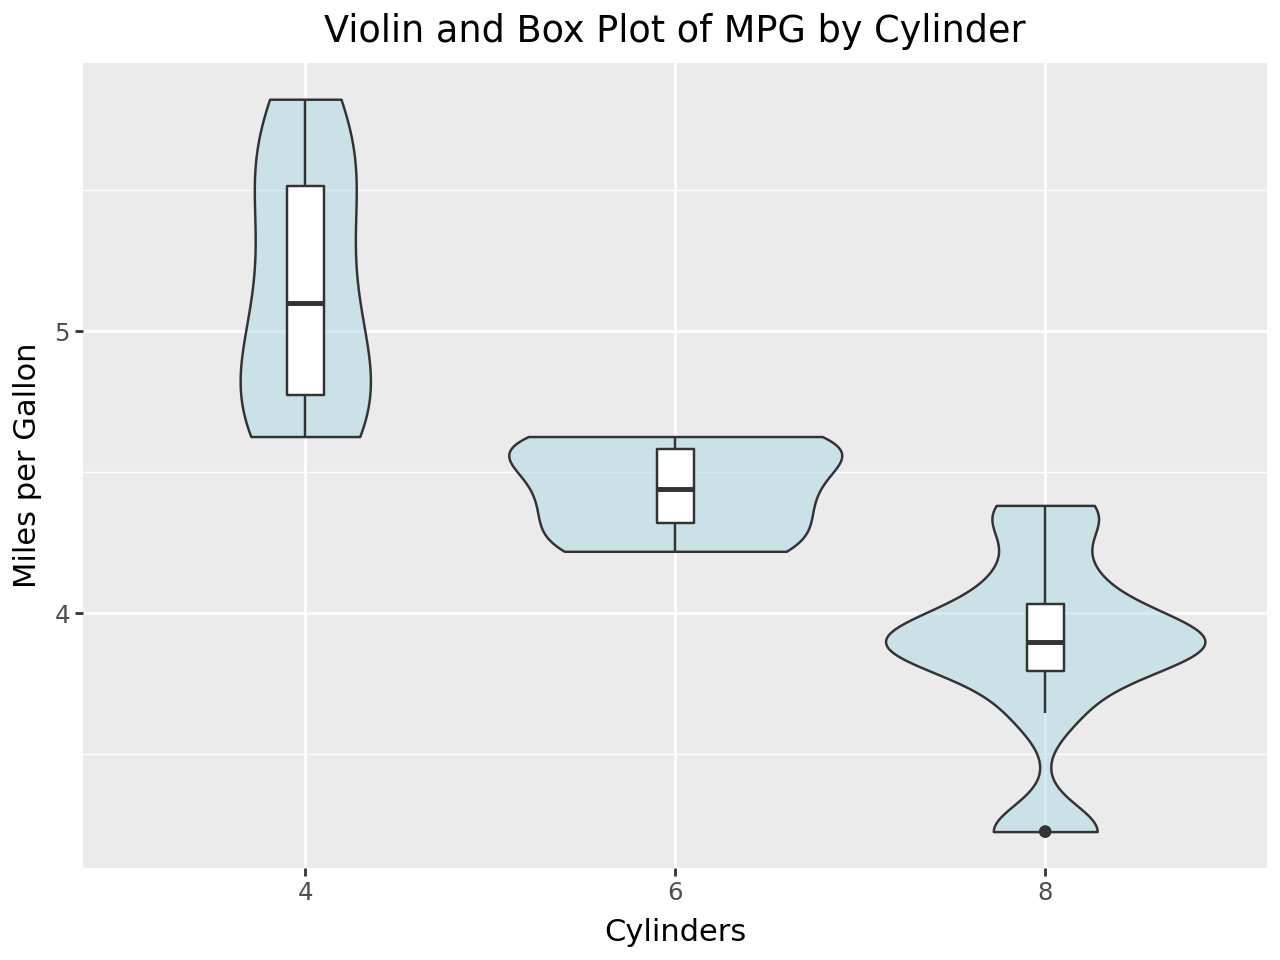

In [21]:
# Combined Box Plot and Violin Plot: MPG vs Cylinders
(ggplot(mtcars, aes(x='factor(cyl)', y='mpg')) +
 geom_violin(fill="lightblue", alpha=0.5) +  # Transparent violin plot
 geom_boxplot(width=0.1) +  # Add thin box plot inside
 labs(title='Violin and Box Plot of MPG by Cylinder',
      x='Cylinders',
      y='Miles per Gallon'))


### Comparing Box Plot and Violin Plot:
### Box Plot: Provides a clear summary of the data distribution (median, quartiles, outliers) but doesn't show as much detail about the shape of the distribution.Violin Plot: Shows the full distribution and density but doesn't provide the precise quartile information as clearly as a box plot.